In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy, pandas, seaborn as plotse, os, matplotlib.pyplot as plotmat
from IPython.display import display, HTML

from sklearn import linear_model, svm, neighbors, neural_network, ensemble, tree
from sklearn import utils,decomposition,preprocessing, pipeline
from sklearn import metrics,model_selection, feature_selection

## Read and Analyze Heart Disease Data

In [2]:
def DataClnHrt(data_1): 
    ftct=data_1.dtypes[data_1.dtypes=='object'].index.tolist()   
    clean_fets=[[] for i in range(len(ftct))]
    for i in range(len(ftct)):
        for j in range(len(data_1[ftct[i]].tolist())): 
            if data_1[ftct[i]].tolist()[j]=="?":   
                clean_fets[i].append(0)    
            else:
                clean_fets[i].append(data_1[ftct[i]].tolist()[j]) 
        data_1[ftct[i]]=numpy.array(clean_fets[i],float) 
    print(data_1.info())
    return data_1 

In [3]:
fets_hearts=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]
dirfiles=os.listdir(os.getcwd()) 
data_to_take=[]
for drf in dirfiles:
    if ".data" in drf:
        data_to_take.append(drf)
H1,H2,H3=pandas.read_csv(data_to_take[0],names=fets_hearts),pandas.read_csv(data_to_take[0],names=fets_hearts),pandas.read_csv(data_to_take[0],names=fets_hearts)
Data_1H=pandas.concat([H1,H2,H3])
Data_1H=utils.resample(Data_1H, replace = True, n_samples = len(Data_1H)*2, random_state = 0).reset_index(drop=True)
Data_1H=utils.resample(Data_1H, replace = True, n_samples = int(len(Data_1H)/2), random_state = 0).reset_index(drop=True)
print(len(H1),len(H2),len(H3))
print("Total Instances (Patients Records) in Data-1: ",len(H1))
print("Total Instances (Patients Records) in Data-2: ",len(H2))
print("Total Instances (Patients Records) in Data-3: ",len(H3))
print("Data Records (Total): ",len(Data_1H))
Data_1H.head()

303 303 303
Total Instances (Patients Records) in Data-1:  303
Total Instances (Patients Records) in Data-2:  303
Total Instances (Patients Records) in Data-3:  303
Data Records (Total):  909


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,55.0,0.0,2.0,135.0,250.0,0.0,2.0,161.0,0.0,1.4,2.0,0.0,3.0,0
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,54.0,1.0,4.0,120.0,188.0,0.0,0.0,113.0,0.0,1.4,2.0,1.0,7.0,2
3,65.0,0.0,3.0,140.0,417.0,1.0,2.0,157.0,0.0,0.8,1.0,1.0,3.0,0
4,50.0,1.0,3.0,129.0,196.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0,0


In [4]:
Data_1H=Data_1H.reset_index(drop=True) 
Data_1H=DataClnHrt(Data_1H)
print(Data_1H.isna().sum())
Data_1H.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 14 columns):
 #   Column    Non-Null Count  D  
---  ------    --------------  -----  
 0   age       909 non-null    float64
 1   sex       909 non-null    float64
 2   cp        909 non-null    float64
 3   trestbps  909 non-null    float64
 4   chol      909 non-null    float64
 5   fbs       909 non-null    float64
 6   restecg   909 non-null    float64
 7   thalach   909 non-null    float64
 8   exang     909 non-null    float64
 9   oldpeak   909 non-null    float64
 10  slope     909 non-null    float64
 11  ca        909 non-null    float64
 12  thal      909 non-null    float64
 13  target    909 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 99.5 KB
None
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,55.0,0.0,2.0,135.0,250.0,0.0,2.0,161.0,0.0,1.4,2.0,0.0,3.0,0
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,54.0,1.0,4.0,120.0,188.0,0.0,0.0,113.0,0.0,1.4,2.0,1.0,7.0,2
3,65.0,0.0,3.0,140.0,417.0,1.0,2.0,157.0,0.0,0.8,1.0,1.0,3.0,0
4,50.0,1.0,3.0,129.0,196.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0,0


In [5]:
ClassHl,ClassHr="Healthy","Heart Disease"
Data_1H['target']=Data_1H['target'].replace(Data_1H['target'].unique(),[ClassHl,ClassHr,ClassHr,ClassHr,ClassHr])
Data_1H['sex']=Data_1H['sex'].replace(Data_1H['sex'].unique(),["Male","Female"]) 
Data_1H.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,55.0,Male,2.0,135.0,250.0,0.0,2.0,161.0,0.0,1.4,2.0,0.0,3.0,Healthy
1,37.0,Female,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,Healthy
2,54.0,Female,4.0,120.0,188.0,0.0,0.0,113.0,0.0,1.4,2.0,1.0,7.0,Heart Disease
3,65.0,Male,3.0,140.0,417.0,1.0,2.0,157.0,0.0,0.8,1.0,1.0,3.0,Healthy
4,50.0,Female,3.0,129.0,196.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0,Healthy


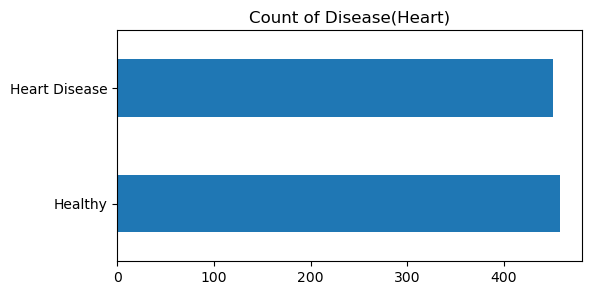

In [6]:
Data_1H['target'].value_counts().plot(kind='barh',title="Count of Disease(Heart)",figsize=(6,3))  
plotmat.show()    

<AxesSubplot:title={'center':'Heart Disease by Gender'}, ylabel='sex'>

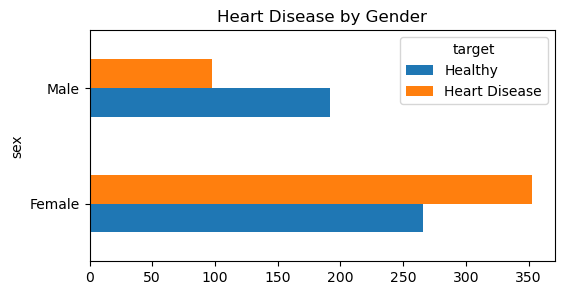

In [7]:
pandas.crosstab(Data_1H.sex,Data_1H.target).plot(kind='barh',title="Heart Disease by Gender",figsize=(6,3))

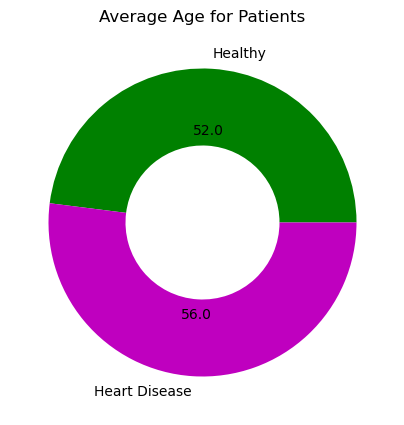

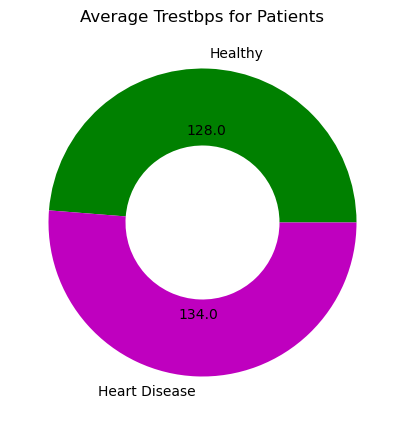

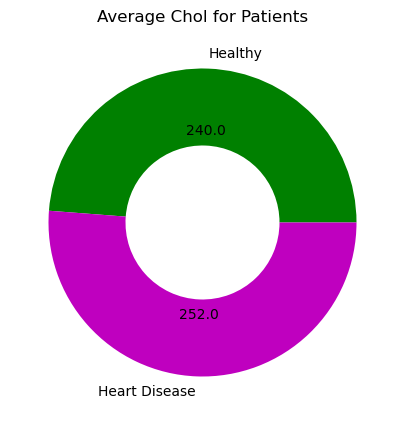

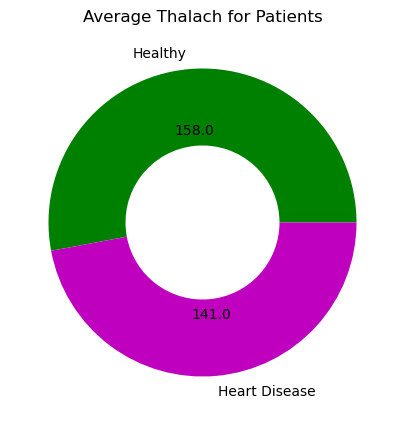

In [8]:
VizFets=["age",
       "trestbps",
       "chol",
       "thalach"
      ] 
hds=Data_1H[Data_1H['target']==ClassHl]
hlt=Data_1H[Data_1H['target']==ClassHr]

for c in VizFets:  
    healthy_mean=hds[c].mean()
    hrt_mean=hlt[c].mean()
    arr=numpy.array([healthy_mean,hrt_mean])
    def val(x):
        val_abs  = numpy.round(x/100.*arr.sum(), 0)
        return val_abs
    plotmat.figure(figsize=(5,5))
    plotmat.title("Average {} for Patients".format(c.capitalize()))
    plotmat.pie([healthy_mean,hrt_mean],labels=Data_1H['target'].unique(), autopct=val,wedgeprops={"width":0.5},colors=["g","m"])
    plotmat.show()

## Read and Analyze Kidney Disease Data

In [9]:
Data_2K=pandas.read_csv("kidney_disease.csv") 
Data_2K.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [10]:
Data_2K.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [11]:
Data_2K.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [12]:
def Clean_Kidney_Data(data_2): 
    try:
        data_2['classification']=data_2['classification'].replace(data_2['classification'].unique(),['ckd','ckd','notckd'])
    except: 
        pass
    obdata_2=data_2.dtypes[data_2.dtypes=='object'].index.tolist() 
    nmdata_2=data_2.dtypes[data_2.dtypes!='object'].index.tolist()
    for oc in obdata_2:
        data_2[oc]=data_2[oc].fillna(data_2[oc].mode()[0])
    for nc in nmdata_2:
        data_2[nc]=data_2[nc].fillna(data_2[nc].mode()[0])
    transfets=['pcv', 'wc', 'rc']
    for t in transfets: 
        dtarr=numpy.array(data_2[t]) 
        formed_fets=[] 
        for x in dtarr:
            if x.isdigit()==False:
                formed_fets.append(0)
            else:
                formed_fets.append(x)
        data_2[t]=numpy.array(formed_fets,float)
    print(data_2.isna().sum())
    print(data_2.info())
    print(data_2['classification'].value_counts())
    return data_2
Data_2Kcln=Clean_Kidney_Data(Data_2K)
Data_2Kcln.head(10)

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,0.0,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,0.0,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,0.0,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,0.0,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,0.0,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,normal,normal,notpresent,notpresent,...,39.0,7800.0,0.0,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,normal,normal,notpresent,notpresent,...,36.0,9800.0,0.0,no,no,no,good,no,no,ckd
7,7,24.0,80.0,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33.0,9600.0,0.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29.0,12100.0,0.0,yes,yes,no,poor,no,yes,ckd


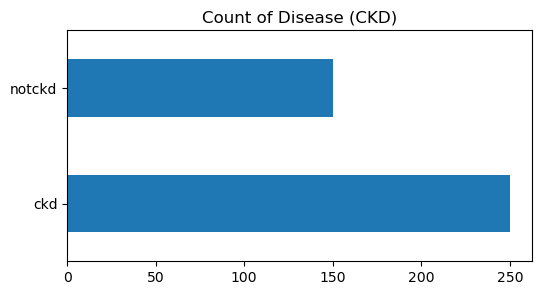

In [13]:
Data_2Kcln['classification'].value_counts().plot(kind='barh',title="Count of Disease (CKD)",figsize=(6,3))
plotmat.show()

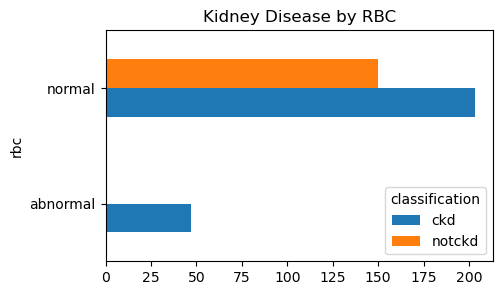

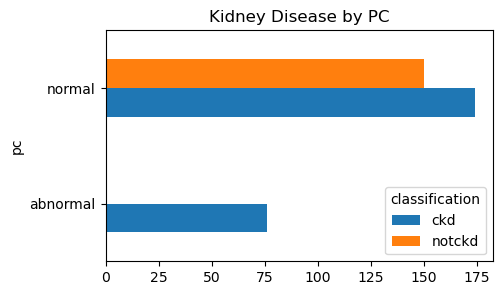

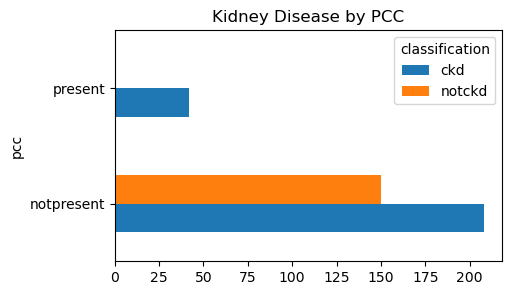

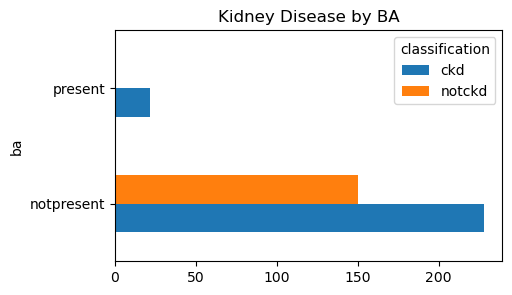

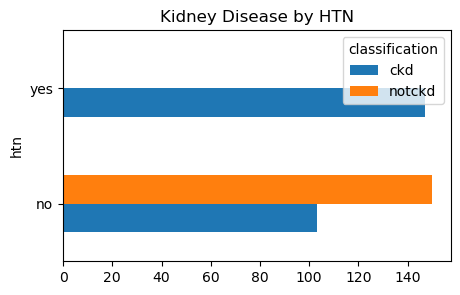

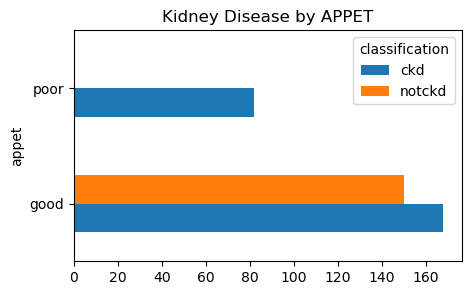

In [14]:
fets=['rbc','pc','pcc','ba','htn','appet']
for f in fets:
    pandas.crosstab(Data_2K[f],Data_2K.classification).plot(kind='barh',title="Kidney Disease by {}".format(f.upper()),figsize=(5,3))
    plotmat.show()

In [15]:
Data_1H.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,55.0,Male,2.0,135.0,250.0,0.0,2.0,161.0,0.0,1.4,2.0,0.0,3.0,Healthy
1,37.0,Female,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,Healthy
2,54.0,Female,4.0,120.0,188.0,0.0,0.0,113.0,0.0,1.4,2.0,1.0,7.0,Heart Disease
3,65.0,Male,3.0,140.0,417.0,1.0,2.0,157.0,0.0,0.8,1.0,1.0,3.0,Healthy
4,50.0,Female,3.0,129.0,196.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0,Healthy


In [16]:
Data_2K.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,0.0,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,0.0,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,0.0,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,0.0,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,0.0,no,no,no,good,no,no,ckd


In [17]:
def EncodingFunc(data, dn): 
    data_opr=data.copy()
    print("Information Before Encdoing {} Data:\n".format(dn))   
    print(data_opr.info()) 
    ctdata_opr=data_opr.dtypes[data_opr.dtypes=='object'].index.tolist()[:-1] 
    print(ctdata_opr)
    for c in ctdata_opr:
        data_opr[c]=data_opr[c].replace(data_opr[c].unique(),[x for x in range(len(data_opr[c].unique()))]) 
    print("Information After Encdoing {} Data:\n".format(dn))   
    print(data_opr.info())
    return data_opr

In [18]:
alldt=[Data_1H, Data_2K]
HKDt=['Heart Disease','Kidney Disease'] 
EncDts=[]
for d in range(len(alldt)):
    EncDts.append(EncodingFunc(alldt[d], HKDt[d]))
EncDts[0].head()

Information Before Encdoing Heart Disease Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       909 non-null    float64
 1   sex       909 non-null    object 
 2   cp        909 non-null    float64
 3   trestbps  909 non-null    float64
 4   chol      909 non-null    float64
 5   fbs       909 non-null    float64
 6   restecg   909 non-null    float64
 7   thalach   909 non-null    float64
 8   exang     909 non-null    float64
 9   oldpeak   909 non-null    float64
 10  slope     909 non-null    float64
 11  ca        909 non-null    float64
 12  thal      909 non-null    float64
 13  target    909 non-null    object 
dtypes: float64(12), object(2)
memory usage: 99.5+ KB
None
['sex']
Information After Encdoing Heart Disease Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 14 columns):
 #

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,55.0,0,2.0,135.0,250.0,0.0,2.0,161.0,0.0,1.4,2.0,0.0,3.0,Healthy
1,37.0,1,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,Healthy
2,54.0,1,4.0,120.0,188.0,0.0,0.0,113.0,0.0,1.4,2.0,1.0,7.0,Heart Disease
3,65.0,0,3.0,140.0,417.0,1.0,2.0,157.0,0.0,0.8,1.0,1.0,3.0,Healthy
4,50.0,1,3.0,129.0,196.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0,Healthy


In [19]:
EncDts[1].head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,...,44.0,7800.0,0.0,0,0,0,0,0,0,ckd
1,1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,...,38.0,6000.0,0.0,1,1,0,0,0,0,ckd
2,2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,...,31.0,7500.0,0.0,1,0,0,1,0,1,ckd
3,3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,...,32.0,6700.0,0.0,0,1,0,1,1,1,ckd
4,4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,...,35.0,7300.0,0.0,1,1,0,0,0,0,ckd


In [20]:
def OutRemFunc(dthk,n,w,h,col,txtstr,dnm):
    arrdthk=numpy.array(dthk.iloc[:,:-1])   
    pcdthk = decomposition.PCA(n_components=n)
    pcdthk.fit(arrdthk)
    pcdthkcm=["Comp-{}".format(i+1) for i in range(len(pcdthk.explained_variance_ratio_.tolist()))]
    plotmat.figure(figsize=(w,h)) 
    plotmat.title("Variance(PCA={})\n{} Normalization {} Data\nMaximum Variance Value: {}".format(n,txtstr,dnm,round(max(pcdthk.explained_variance_ratio_),8)),fontsize=18)
    plotmat.bar(pcdthkcm,pcdthk.explained_variance_ratio_.tolist(),width=0.5,color=col)
    plotmat.xlabel("Components",fontsize=14)
    plotmat.ylabel("Variance",fontsize=14)
    plotmat.grid()
    plotmat.show()
    return pcdthk.explained_variance_ratio_

In [21]:
def SclFunc(df):
    prepproc = preprocessing.MinMaxScaler()
    nrm_df=prepproc.fit_transform(df)
    return nrm_df 

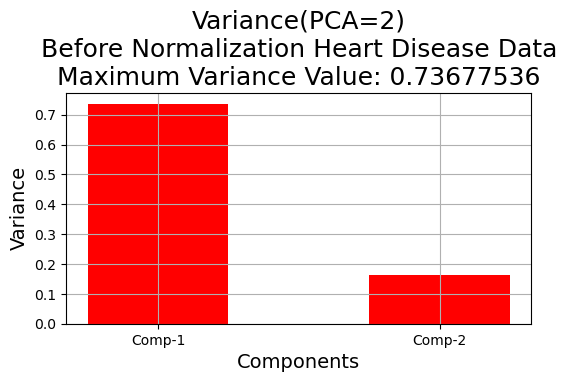

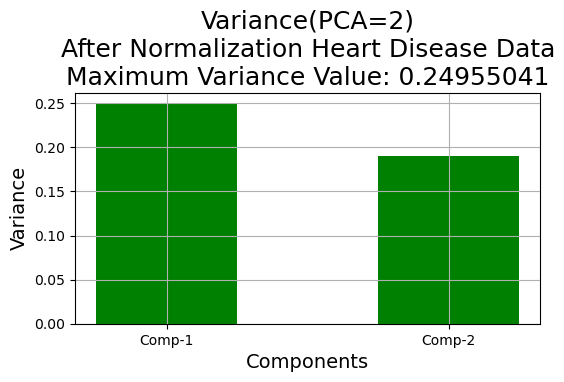

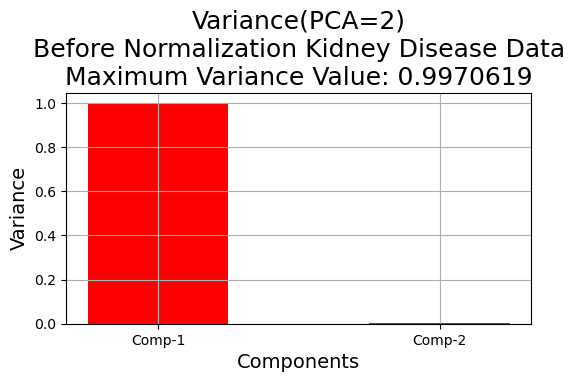

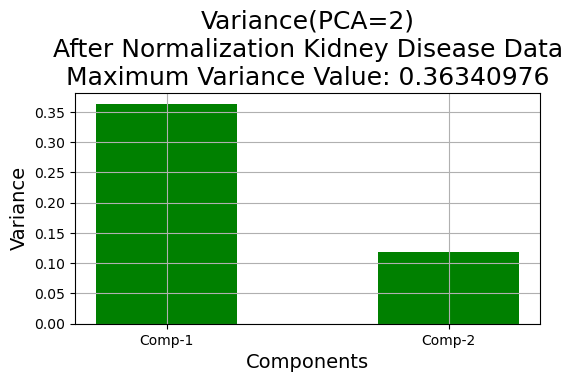

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.541667,0.0,0.333333,0.386792,0.274827,0.0,1.0,0.687023,0.0,0.225806,0.5,0.000000,0.428571,Healthy
1,0.166667,1.0,0.666667,0.339623,0.274827,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.428571,Healthy
2,0.520833,1.0,1.000000,0.245283,0.131640,0.0,0.0,0.320611,0.0,0.225806,0.5,0.333333,1.000000,Heart Disease
3,0.750000,0.0,0.666667,0.433962,0.660508,1.0,1.0,0.656489,0.0,0.129032,0.0,0.333333,0.428571,Healthy
4,0.437500,1.0,0.666667,0.330189,0.150115,0.0,0.0,0.702290,0.0,0.000000,0.0,0.000000,0.428571,Healthy
5,0.708333,0.0,1.000000,0.132075,0.318707,0.0,0.0,0.748092,1.0,0.290323,0.5,0.666667,0.428571,Heart Disease
6,0.729167,0.0,0.666667,0.433962,0.420323,0.0,0.0,0.473282,0.0,0.032258,0.0,0.000000,1.000000,Healthy
7,0.541667,1.0,1.000000,0.358491,0.512702,0.0,0.0,0.465649,1.0,0.193548,0.5,0.333333,1.000000,Heart Disease
8,0.604167,1.0,1.000000,0.528302,0.321016,0.0,1.0,0.305344,1.0,0.129032,0.0,0.000000,1.000000,Heart Disease
9,0.520833,1.0,0.666667,0.245283,0.293303,0.0,1.0,0.580153,0.0,0.064516,0.5,0.000000,1.000000,Healthy


In [22]:
Data_OutRem=[]
ix=0
for edt in EncDts:
    edtpc=[] 
    edtpc.append(OutRemFunc(edt.drop(edt.columns.tolist()[-1],axis=1),2,6,3,"r","Before",HKDt[ix]))

    fledt=[]  
    foutedt=[]   
    for rp in edtpc: 
        for r in rp:
            if r>0.6:
                fledt.append("Outlier in Component-{} with Variance Value {}".format(rp.tolist().index(r)+1,round(r,5)))
                foutedt.append(True)
    if len(foutedt)==1 and True in foutedt: 
        SclData=SclFunc(edt.drop(edt.columns.tolist()[-1],axis=1))
    SclData=pandas.DataFrame(SclData,columns=edt.drop(edt.columns.tolist()[-1],axis=1).columns.tolist())
    SclData[edt.columns.tolist()[-1]]=edt[edt.columns.tolist()[-1]]
    # check outlier again
    OutRemFunc(SclData.drop(SclData.columns.tolist()[-1],axis=1),2,6,3,"g","After",HKDt[ix])
    Data_OutRem.append(SclData) 
    ix+=1
Data_OutRem[0].head(10)

In [23]:
Data_OutRem[1].head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.000000,0.522727,0.230769,0.75,0.2,0.0,0.0,0.0,0.0,0.0,...,0.814815,0.295455,0.0,0.0,0.00,0.0,0.0,0.0,0.0,ckd
1,0.002506,0.056818,0.000000,0.75,0.8,0.0,0.0,0.0,0.0,0.0,...,0.703704,0.227273,0.0,1.0,0.25,0.0,0.0,0.0,0.0,ckd
2,0.005013,0.681818,0.230769,0.25,0.4,0.6,0.0,0.0,0.0,0.0,...,0.574074,0.284091,0.0,1.0,0.00,0.0,1.0,0.0,1.0,ckd
3,0.007519,0.522727,0.153846,0.00,0.8,0.0,0.0,1.0,1.0,0.0,...,0.592593,0.253788,0.0,0.0,0.25,0.0,1.0,1.0,1.0,ckd
4,0.010025,0.556818,0.230769,0.25,0.4,0.0,0.0,0.0,0.0,0.0,...,0.648148,0.276515,0.0,1.0,0.25,0.0,0.0,0.0,0.0,ckd
5,0.012531,0.659091,0.307692,0.50,0.6,0.0,0.0,0.0,0.0,0.0,...,0.722222,0.295455,0.0,0.0,0.00,0.0,0.0,1.0,0.0,ckd
6,0.015038,0.750000,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,...,0.666667,0.371212,0.0,1.0,0.25,0.0,0.0,0.0,0.0,ckd
7,0.017544,0.250000,0.230769,0.50,0.4,0.8,0.0,1.0,0.0,0.0,...,0.814815,0.261364,1.0,1.0,0.00,0.0,0.0,1.0,0.0,ckd
8,0.020050,0.568182,0.384615,0.50,0.6,0.0,0.0,1.0,1.0,0.0,...,0.611111,0.363636,0.0,0.0,0.00,0.0,0.0,0.0,1.0,ckd
9,0.022556,0.579545,0.307692,0.75,0.4,0.0,1.0,1.0,1.0,0.0,...,0.537037,0.458333,0.0,0.0,0.00,0.0,1.0,0.0,1.0,ckd


In [24]:
def FetModel1(dthk, nm): 
    print("--------------------------------------------------------------")
    print("Feature Selection for {} Data using Chi-Squred".format(nm))
    print("--------------------------------------------------------------")
    Xdthk=dthk.drop([dthk.columns.tolist()[-1]],axis=1)
    Ydthk=dthk[dthk.columns.tolist()[-1]] 
    Ydthk=Ydthk.replace(Ydthk.unique(),[x for x in range(len(Ydthk.unique()))]) 
    ftm1=feature_selection.SelectKBest(feature_selection.chi2, k=(len(dthk.columns)-1)-3)
    ftm1.fit(Xdthk, Ydthk)   # train model
    print("Selected Features for {} Data using Chi-Squred: \n".format(nm),*Xdthk.columns[ftm1.get_support()],sep="\n")
    print("--------------------------------------------------------------")
    return Xdthk.columns[ftm1.get_support()]

In [25]:
def FetModel2(dthk, nm): 
    print("--------------------------------------------------------------")
    print("Feature Selection for {} Data using RFE".format(nm))
    print("--------------------------------------------------------------")
    Xdthk=dthk.drop([dthk.columns.tolist()[-1]],axis=1)
    Ydthk=dthk[dthk.columns.tolist()[-1]] 
    Ydthk=Ydthk.replace(Ydthk.unique(),[x for x in range(len(Ydthk.unique()))])
    ftm1 = feature_selection.RFE(estimator=linear_model.LogisticRegression(),n_features_to_select = (len(dthk.columns)-1)-3, step = 0.7)
    ftm1fitted=ftm1.fit(Xdthk,Ydthk)   # train model
    print("Selected Features for {} Data using RFE: \n".format(nm),*Xdthk.columns[ftm1fitted.get_support()],sep="\n")
    print("--------------------------------------------------------------")
    return Xdthk.columns[ftm1fitted.get_support()]

In [26]:
SelecetdFets=[[],[]] 
for dn in range(len(Data_OutRem)):
    ft1=FetModel1(Data_OutRem[dn],HKDt[dn]) 
    ft2=FetModel2(Data_OutRem[dn],HKDt[dn]) 
    for x in ft1:  
        if x in ft2: 
            SelecetdFets[dn].append(x) 

--------------------------------------------------------------
Feature Selection for Heart Disease Data using Chi-Squred
--------------------------------------------------------------
Selected Features for Heart Disease Data using Chi-Squred: 

age
sex
cp
restecg
thalach
exang
oldpeak
slope
ca
thal
--------------------------------------------------------------
--------------------------------------------------------------
Feature Selection for Heart Disease Data using RFE
--------------------------------------------------------------
Selected Features for Heart Disease Data using RFE: 

sex
cp
trestbps
chol
thalach
exang
oldpeak
slope
ca
thal
--------------------------------------------------------------
--------------------------------------------------------------
Feature Selection for Kidney Disease Data using Chi-Squred
--------------------------------------------------------------
Selected Features for Kidney Disease Data using Chi-Squred: 

id
age
bp
sg
al
su
rbc
pc
pcc
ba
bgr
bu

In [27]:
for sf in range(len(SelecetdFets)):
    print("\nFinally Selected Features for {} Data: \n".format(HKDt[sf]))
    print(*SelecetdFets[sf], sep="\n")


Finally Selected Features for Heart Disease Data: 

sex
cp
thalach
exang
oldpeak
slope
ca
thal

Finally Selected Features for Kidney Disease Data: 

id
bp
sg
al
su
rbc
pc
pcc
ba
bgr
bu
sc
hemo
pcv
htn
dm
cad
appet
pe
ane


In [28]:
def DataPrepFunc(dta,selfn,nm): 
    datapr=dta[selfn]   
    datatrg=dta[dta.columns.tolist()[-1]] 
    display(HTML(datapr.head(10).to_html())) 
    trn_X, tst_X, trn_Y, tst_Y=model_selection.train_test_split(datapr, datatrg, test_size=0.25, random_state=42) # split data with                                                  
    return trn_X, tst_X, trn_Y, tst_Y

In [29]:
XTrHK, XTsHK, yTrHK, yTsHK=[[],[],[],[]]     
for ndt in range(len(Data_OutRem)):   
    DataPreped=DataPrepFunc(Data_OutRem[ndt],SelecetdFets[ndt],HKDt[ndt])
    XTrHK.append(DataPreped[0])  
    XTsHK.append(DataPreped[1]) 
    yTrHK.append(DataPreped[2]) 
    yTsHK.append(DataPreped[3])

,sex,cp,thalach,exang,oldpeak,slope,ca,thal
0,0.0,0.333333,0.687023,0.0,0.225806,0.5,0.000000,0.428571
1,1.0,0.666667,0.885496,0.0,0.564516,1.0,0.000000,0.428571
2,1.0,1.000000,0.320611,0.0,0.225806,0.5,0.333333,1.000000
3,0.0,0.666667,0.656489,0.0,0.129032,0.0,0.333333,0.428571
4,1.0,0.666667,0.702290,0.0,0.000000,0.0,0.000000,0.428571
5,0.0,1.000000,0.748092,1.0,0.290323,0.5,0.666667,0.428571
6,0.0,0.666667,0.473282,0.0,0.032258,0.0,0.000000,1.000000
7,1.0,1.000000,0.465649,1.0,0.193548,0.5,0.333333,1.000000
8,1.0,1.000000,0.305344,1.0,0.129032,0.0,0.000000,1.000000
9,1.0,0.666667,0.580153,0.0,0.064516,0.5,0.000000,1.000000


,id,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,hemo,pcv,htn,dm,cad,appet,pe,ane
0,0.000000,0.230769,0.75,0.2,0.0,0.0,0.0,0.0,0.0,0.211538,0.088575,0.010582,0.836735,0.814815,0.0,0.00,0.0,0.0,0.0,0.0
1,0.002506,0.000000,0.75,0.8,0.0,0.0,0.0,0.0,0.0,0.164530,0.042362,0.005291,0.557823,0.703704,1.0,0.25,0.0,0.0,0.0,0.0
2,0.005013,0.230769,0.25,0.4,0.6,0.0,0.0,0.0,0.0,0.856838,0.132221,0.018519,0.442177,0.574074,1.0,0.00,0.0,1.0,0.0,1.0
3,0.007519,0.153846,0.00,0.8,0.0,0.0,1.0,1.0,0.0,0.202991,0.139923,0.044974,0.551020,0.592593,0.0,0.25,0.0,1.0,1.0,1.0
4,0.010025,0.230769,0.25,0.4,0.0,0.0,0.0,0.0,0.0,0.179487,0.062901,0.013228,0.578231,0.648148,1.0,0.25,0.0,0.0,0.0,0.0
5,0.012531,0.307692,0.50,0.6,0.0,0.0,0.0,0.0,0.0,0.111111,0.060334,0.009259,0.619048,0.722222,0.0,0.00,0.0,0.0,1.0,0.0
6,0.015038,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.134788,0.312169,0.632653,0.666667,1.0,0.25,0.0,0.0,0.0,0.0
7,0.017544,0.230769,0.50,0.4,0.8,0.0,1.0,0.0,0.0,0.829060,0.075738,0.009259,0.632653,0.814815,1.0,0.00,0.0,0.0,1.0,0.0
8,0.020050,0.384615,0.50,0.6,0.0,0.0,1.0,1.0,0.0,0.247863,0.150193,0.019841,0.523810,0.611111,0.0,0.00,0.0,0.0,0.0,1.0
9,0.022556,0.307692,0.75,0.4,0.0,1.0,1.0,1.0,0.0,0.102564,0.270860,0.089947,0.435374,0.537037,0.0,0.00,0.0,1.0,0.0,1.0


In [30]:
for n in range(len(HKDt)):
    print("\nTest Class Support for {} Data\n".format(HKDt[n]))
    print(yTsHK[n].value_counts())  


Test Class Support for Heart Disease Data

Heart Disease    116
Healthy          112
Name: target, dtype: int64

Test Class Support for Kidney Disease Data

ckd       65
notckd    35
Name: classification, dtype: int64
